# Práctica 4 Parte I. Visualización de datos en Python

En el área del aprendizaje automático, la *visualización de datos* no es sólo una manera de preparar gráficos para los informes, sino que se utiliza en distintas fases de los proyectos. 

Para empezar, la exploración visual de los datos es lo primero que se tiende a hacer cuando se aborda una nueva tarea. A través de gráficas y tablas es posible resumir los datos y eliminar aquellos que no son relevantes para la tarea a abordar. Para las personas, los resúmenes de datos en tablas y gráficas son mucho más legibles que cientos de líneas de datos. 

La visualización de datos también se utiliza para analizar el rendimiento de un modelo, ya que para interpretar modelos complejos se hace necesario proyectar espacios de alta dimensionalidad en gráficos 2D o 3D. 

En resumen, la visualización de datos es una manera rápida de aprender algo nuevo sobre los datos con los que se está trabajando. 

## Visualizando 
### 1. Dataset

Antes de comenzar vamos a cargar las librerías que serán necesarias. Con respecto a prácticas anteriores aparecen dos nuevas librerías [matplotlib](https://matplotlib.org/) y [seaborn](https://seaborn.pydata.org/). La versión de seaborn instalada en el entorno de Google Colaboratory no incluye algunos gráficos, por lo que lo primero que vamos a hacer es descargar la última versión de esta librería usando el siguiente comando.

In [1]:
!pip install seaborn -Uq

A continuación importamos las librerías que usaremos en este parte de la práctica.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles. 
%config InlineBackend.figure_format = 'svg'

Utilizamos de nuevo el dataset de fidelidad de clientes. Por lo que tenemos que descargar dicho dataset y luego lo cargamos en un `DataFrame` de pandas:

In [3]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/telecom_churn.csv -O telecom_churn.csv

--2022-04-15 16:29:33--  https://raw.githubusercontent.com/IA1819/Datasets/master/telecom_churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279997 (273K) [text/plain]
Saving to: ‘telecom_churn.csv’

telecom_churn.csv   100%[===================>] 273.43K  --.-KB/s    in 0.02s   

2022-04-15 16:29:34 (14.1 MB/s) - ‘telecom_churn.csv’ saved [279997/279997]



In [4]:
df = pd.read_csv('telecom_churn.csv')

Para hacernos una idea de nuestros datos, vamos a ver las 5 primeras entradas del dataset usando `head()`:

In [5]:
df.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

A continuación se muestra la descripción de las distintas características de este dataset. 

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

La última columna, **Churn**, es una variable binaria que indica si la compañía perdió a ese cliente. Por el momento no nos preocuparemos de la misma. 

### 2. Visualización univariante

El análisis univariante se centra en un descriptor cada vez. Cuando analizamos un descriptor de manera independiente estamos interesados principalmente en conocer la *distribución de sus valores* e ignoramos el resto de descriptores del dataset. 

A continuación se consideran distintos tipos de análisis de una variable. 


#### 2.1 Descriptores cuantitativos

Los descriptores cuantitativos se aplican a valores numéricos. Dichos valores pueden ser *discretos*, como los enteros, o *continuos*, como los reales, y suelen expresar una contabilización o medida. 

*Histogramas y gráficos de densidad*

La manera más sencilla de ver la distribución de una variable númerica consiste en mostrar su *histograma*, para ello podemos usar el método [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html) de un `DataFrame`.

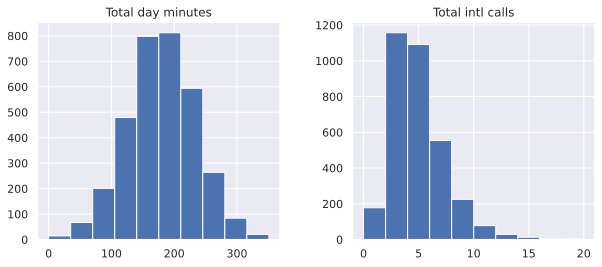

In [55]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

Un histograma agrupa los valores en cajas, o *bins*, de rangos de valores. La forma del histograma puede contener pistas sobre la distribución subyacente: Gaussiana, exponencial, etc. Con los histogramas también es posible detectar anomalías. Conocer la distribución de los descriptores es importante debido a que la mayoría de algoritmos de aprendizaje automático asumen que tienen un tipo particular (normalmente una Gaussiana). 

En el gráfico anterior, vemos que la variable *Total day minutes* sigue una distribución normal, mientras que  *Total intl calls* está desviada hacia la derecha (su cola es más larga en el lado derecho).

También hay otra manera, muchas veces más clara, de ver las distribuciones y son los gráficos de densidad. Estos pueden verse como una versión [suavizada](https://en.wikipedia.org/wiki/Kernel_smoother) de los histogramas. Su principal ventaja es que no tienen una dependencia con el tamaño de las *bins*. Vamos a ver cómo se crean estos diagramas para las mismas dos variables que antes. 

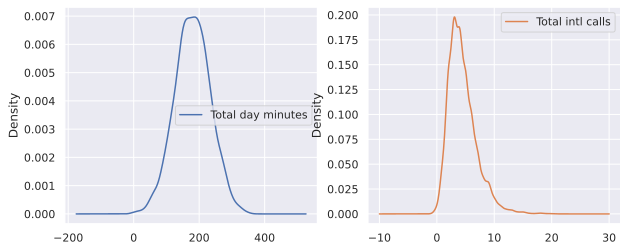

In [53]:
df[features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

También es posible mostrar la distribución de las observaciones con el método [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) de la librería seaborn. Por ejemplo, vamos a ver la distribución para la variable  *Total intl calls*.

In [ ]:
sns.histplot(df['Total intl calls'],stat="density");

La altura de cada barra del histograma muestra la densidad en lugar del número de ejemplos en cada bin.

*Gráficos de cajas*

Otro tipo útil de visualización son los gráficos de cajas, para los cuales la librería seaborn puede ser utilizada.

In [ ]:
sns.boxplot(x='Total intl calls', data=df);

Veámos cómo interpretar el gráfico anterior. Sus componentes son una caja (que es por lo que se conoce a este tipo de gráficos como gráficos de cajas), los *bigotes*, y un número de puntos (conocidos como *outliers* o valores atípicos). 

La caja muestra la extensión intercuartil de la distribución, su longitud viene dada por los percentiles $25 \, (\text{Q1})$ y $75 \, (\text{Q3})$. La línea vertical en la caja muestra la mediana de la distribución. 

Los bigotes son las líneas horizontales que salen de la caja. Estas representan la dispersión completa de los puntos de datos, específicamente los puntos que caen en el intervalo $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, donde $\text{IQR} = \text{Q3} - \text{Q1}$ es el [rango intercuartílico](https://es.wikipedia.org/wiki/Rango_intercuart%C3%ADlico).

Los valores atípicos caen fuera del rango definido por los bigotes y se muestran como puntos individuales. 

A partir del gráfico anterior podemos ver que es raro que haya un gran número de llamadas internacionales en nuestros datos. 

*Gráficos de violines*

El último tipo de gráfico de distribución que vamos a ver son los gráficos de violines. 

En la figura de abajo podemos ver un gráfico de violines. En la parte izquierda vemos el ya familiar gráfico de cajas, mientras que en la derecha vemos el gráfico de violínes donde de ha estimado la densidad del núcleo en ambos lados. 

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

La diferencia entre estos dos gráficos reside en que el gráfico de cajas se centra en mostrar ciertas estadísticas de los datos, mientras que el de violínes se concentra más en mostrar la distribución como un todo. 

*describe()*

Además de las herramientas gráficas, es posible obtener una serie de estadísticas de la distribución usando el método [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) de un `DataFrame`:

In [56]:
features = ['Total day minutes', 'Total intl calls']
df[features].describe()

Total day minutes  Total intl calls
count        3333.000000       3333.000000
mean          179.775098          4.479448
std            54.467389          2.461214
min             0.000000          0.000000
25%           143.700000          3.000000
50%           179.400000          4.000000
75%           216.400000          6.000000
max           350.800000         20.000000

La salida anterior es autoexplicativa. Los valores *25%*, *50%* y *75%* muestran los correspondientes [percentiles](https://es.wikipedia.org/wiki/Percentil).

#### 2.2 Datos categóricos y binarios

Los descriptores categóricos toman un número fijo de valores. Cada uno de estos valores asigna una observación al grupo correspondiete, cada grupo se conoce como categoría. Los descriptores binarios son un caso particular de los descriptores categóricos que solo toman dos posibles valores. Si los valores categóricos tienen un orden, se los conoce como ordinales. 

*Tabla de frecuencias*

Veámos el balance de clases en nuestro dataset mirando la distribución de la variable *churn*. Para ello vamos a considerar la tabla de frecuencias que muestra como de frecuente es cada valor categórico. Para ello usamos el método [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html):

In [16]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

Por defecto, la salida anterior se ordena mostrando primero los valores más frecuentes. 

En nuestro caso, está claro que nuestros datos no están *balanceados*; es decir, que nuestras dos clases (clientes leales y no leales) no están representadas del mismo modo en nuestro dataset. Como podemos ver a partir del resultado anterior solo unos pocos clientes cancelaron su subscripción al servicio. 

*Gráfico de barras*

El gráfico de barras es una representación gráfica de la tabla de frecuencias. La manera más fácil de crearlo es usando la función  [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) de seaborn.

Vamos a mostrar la distribución para dos descriptores categóricos.

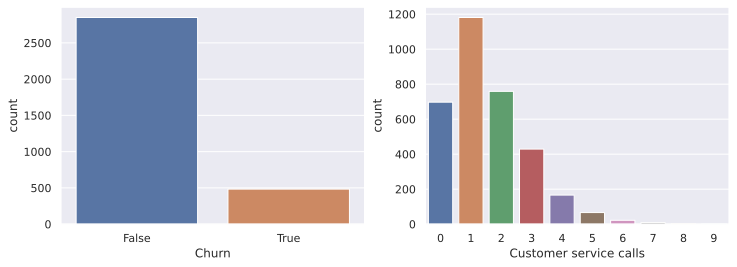

In [17]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0]);
sns.countplot(x='Customer service calls', data=df, ax=axes[1]);

El gráfico anterior claramente muestra el desequilibrio en el descriptor *Churn*. El gráfico de barras para *Customer service calls* nos da una pista que la mayoría de clientes resuelve sus problemas en un máximo de 2 o 3 llamadas. Pero es probable que aquellos clientes de la compañía que deciden abandonarla sean los que más llamadas han realizado. Esto es solo una hipótesis por ahora, pero veremos si es acertada más adelante.

Aunque los histogramas y las gráficas de cajas puedean parecer similares hay varias diferencias entre ellas.
1. Los histogramas se utilizan para mostrar la distribución de descriptores numéricos mientras que los gráficos de cajas se usan para descriptores categóricos.
2. Los valores del eje X en el histograma son numéricos mientras que en el diagrama de cajas puede haber cualquier tipo de valor (números, strings, booleanos).




### 3. Visualización multivariante

Los gráficos multivariantes permiten mostrar relaciones entre dos o más descriptores en una única figura. Como en el caso de los gráficos univariantes el tipo específico de visualización dependerá del tipo de descriptor con el que estemos trabajando. 


#### 3.1 Cuantitativo-Cualitativo

*Matriz de correlación*

Vamos a ver la correlación entre valores númericos de nuestro dataset. Esta información es importante ya que hay algoritmos de aprendizaje automático que no trabajan bien con variables altamente correladas. 

Vamos a utilizar en primer lugar el método [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) en un `DataFrame` que sirve para calcular la correlación entre dos pares de descriptores. Este valor, la matriz de correlación, se le puede pasar al método [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de `seaborn` para mostrar una matriz de colores con los valores proporcionados. 

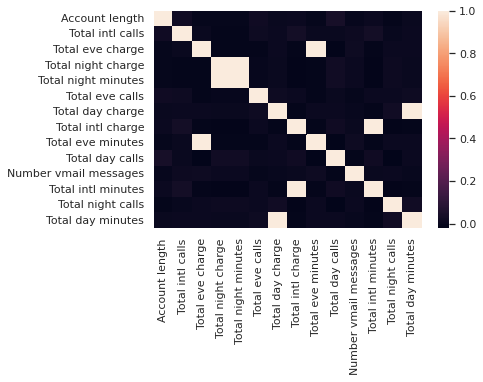

In [27]:
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

A partir del diagrama anterior se puede ver que hay 4 variables (las variables de gasto como *Total day charge*) que han sido calculadas directamente a partir del número de minutos gastados en distintos momentos del día (por ejemplo la variable *Total day minutes* está altamente correlada con la variable *Total day charge*). Estos descriptores se conocen como dependientes y pueden ser descartados ya que no proporcionan ninguna información adicional. 

In [28]:
numerical = list(set(numerical) - 
                 set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

*Diagrama de dispersión*

Los diagramas de dispersión muestran los valores de dos descriptores numéricos en las coordenadas Cartesianas de un espacio 2D. También es posible mostrar diagramas de dispersión en 3D. 

Para mostrar los diagramas de dispersión usaremos el método [`scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) de la librería `matplotlib`:

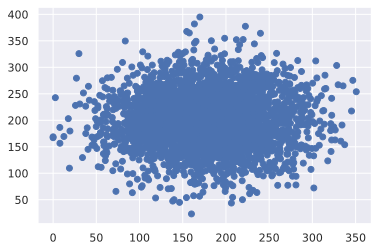

In [18]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

En la gráfica anterior vemos una visión de dos variables distribuidas de forma normal. También parece que estos descriptores no están correlados debido a que hay una forma de elipse que se alinéa con los ejes. 

También es posible mostrar los gráficos de dispersión utilizando la librería `seaborn`:

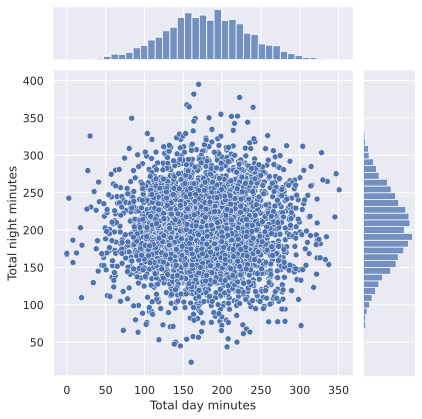

In [19]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

La función [`jointplot()`](https://seaborn.pydata.org/generated/seaborn.jointplot.html) muestra dos histogramas que pueden ser útiles en algunos casos. 

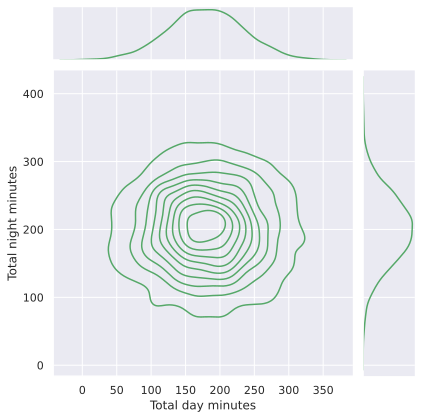

In [20]:
sns.jointplot(x='Total day minutes', y='Total night minutes', data=df,
              kind="kde", color="g");

Mientras que en los gráficos anteriores teníamos descriptores sin correlación, a continuación se muestran las gráficas de dos descriptores altamente correlados. 

In [ ]:
plt.scatter(df['Total day minutes'], df['Total day charge']);

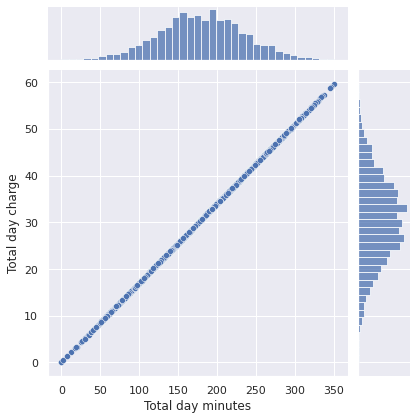

In [23]:
sns.jointplot(x='Total day minutes', y='Total day charge', 
              data=df, kind='scatter');

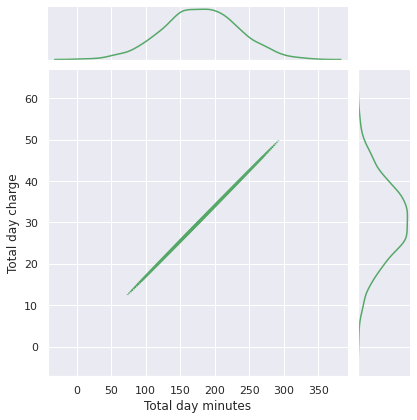

In [24]:
sns.jointplot(x='Total day minutes', y='Total day charge', data=df,
              kind="kde", color="g");

*Matriz de diagramas de dispersión*

En algunos caos, resulta útil mostrar una matriz de diagramas de dispersión como se muestra a continuación. La diagonal de dicha matriz contiene las distribuciones de los correspondientes descriptores, miesntras que los diagramas de dispersión para cada par de descriptores rellenan el resto de la matriz. 

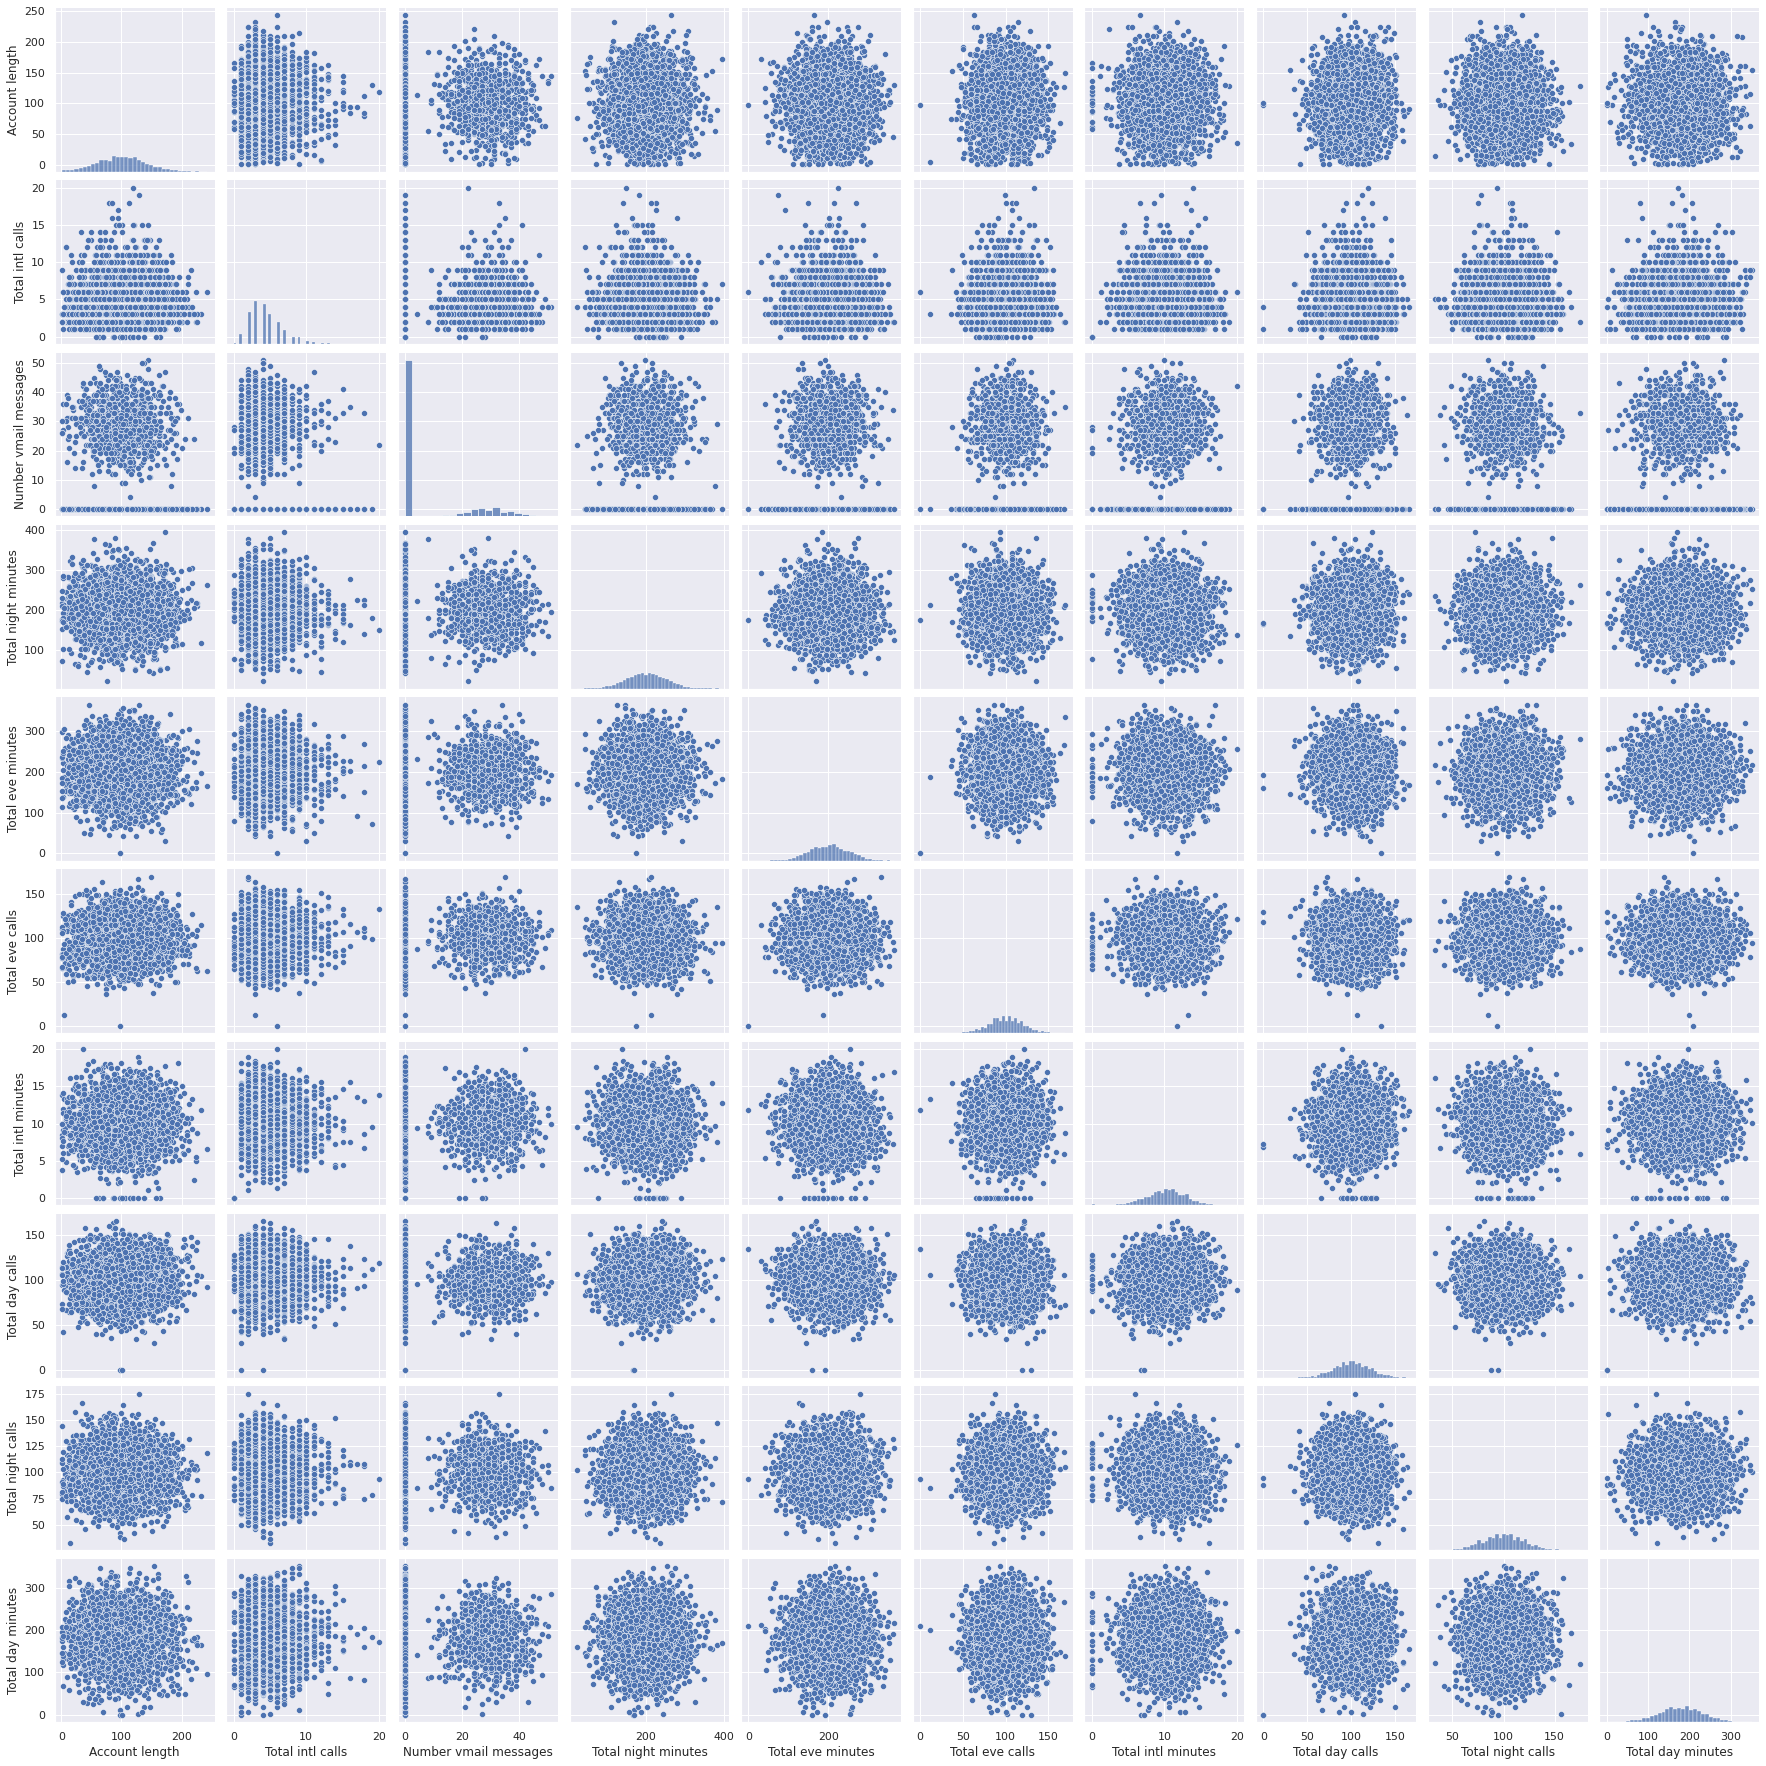

In [29]:
# Cambiamos la configuración a png ya que la generación de diagramas con SVG puede ser muy lenta en este caso
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[numerical]);

In [30]:
# Volvemos a cambiar la configuración
%config InlineBackend.figure_format = 'svg'

En algunos casos dicha visualización para obtener conclusiones a partir de los datos, pero en este caso no hay sorpresas. 

#### 3.2 Cuantitativo-Categórico

Vamos a intentar ahora obtener nueva información sobre la fidelidad de los clientes teniendo en cuenta la interacción entre variables numéricas y categóricas. En concreto vamos a ver cómo distintos descriptores se relacionan con la variable Churn. 

Anteriormente hemos visto los gráficos de dispersión. De manera adicional, los puntos de dichos diagramas se pueden codificar con colores o tamaños para incluir los valores de un tercer descriptor categórico en la misma figura. Esto se puede conseguir con la función `scatter()`, pero vamos a usar la función [`lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) y el parámetro `hue` para indicar el descriptor de interés. 

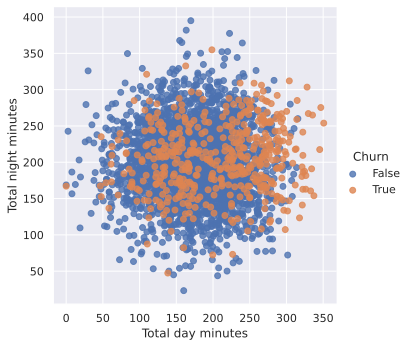

In [33]:
sns.lmplot(x='Total day minutes', y='Total night minutes', data=df, hue='Churn', fit_reg=False);

Parece que una pequeña proporción de los clientes no fieles aparecen en la esquina superior derecha, es decir son clientes que tienden a hablar mucho tanto por el día como por la noche. Pero esto no está completamente claro por lo que no es posible extraer conclusiones. 

Ahora vamos a crear gráficos de cajas para visualizar las distribuciones estadísticas de los descriptores numéricos en dos grupos: los clientes fieles (`Churn=False`) y aquellos que abandonan (`Churn=True`).

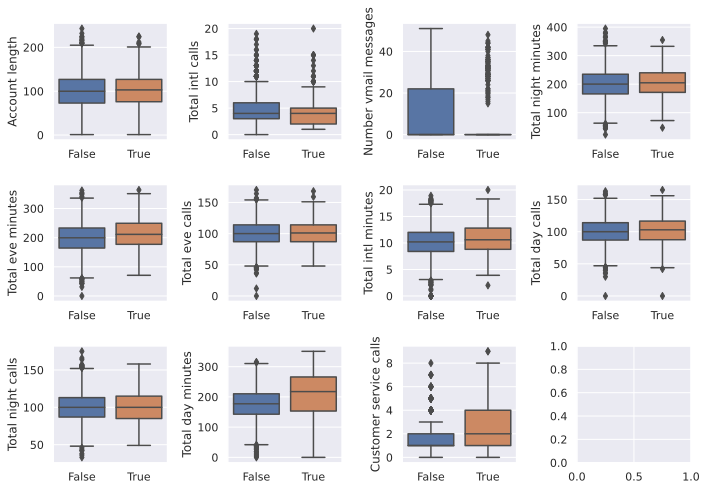

In [34]:
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

En el gráfico anterior se puede ver que la mayor discrepancia en las distribuciones de los dos grupos aparece en tres variables: *Total day minutes*, *Customer service calls*, y *Number vmail messages*.

Veámos la distribución de los minutos hablados por día para los clientes fieles y no fieles. Para ello vamos a crear un gráfico de violines con el valor de *Total day minutes* agrupados por la variable Churn.

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

En este caso, el gráfico de violín no aporta información adicional sobre los datos: los clientes que abandonan tienden a hablar más en en el teléfono. 

En media, los clientes que abandonan la compañía son usuarios más activos en el servicio de comunicaciones. Puede que no estén satisfechos con las tarifas, por lo que una posible medida para evitar el abandono podría ser reducir el precio de las llamadas.

Cuando queremos realizar una análisis cuantitativo de un descriptor en dos dimensiones a la vez, existe una función llamada [`catplot()`](https://seaborn.pydata.org/generated/seaborn.factorplot.html) en seaborn. Por ejemplo, vamos a visualizar la interacción entre el descriptor *Total day minutes* y dos variables categóricas:

In [ ]:
sns.catplot(x='Churn', y='Total day minutes', col='Customer service calls',
               data=df[df['Customer service calls'] < 8], kind="box",
               col_wrap=4, height=3, aspect=.8);

A partir de esto podemos concluir que a partir de 4 llamadas al servicio de atención al cliente, el descriptor *Total day minutes* deja de ser un factor determinante para la fidelidad de los clientes.

#### 3.3 Categóricas-Categóricas

Como hemos visto previamente, el descriptor *Customer service calls* tiene pocos valores únicos que pueden ser considerados o bien como númericos o bien como ordinales. Ya hemos visto su distribución con un diagrama de barras. Ahora estamos interesados en la relación entre este descriptor ordinal y el descriptor *Churn*.

Vamos a ver la distribución del número de llamadas al servicio de atención al cliente, usando de nuevo un diagrama de barras, al cual le vamos a añadir el parámetro `hue=Churn` para añadir una dimensión categórica al diagrama.

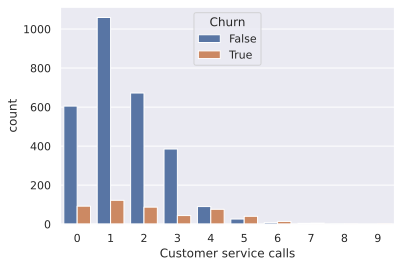

In [45]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);

**Nota**: el ratio de clientes que abandonan la compañia crece de manera significativas después de 4 o más llamadas al servicio de atención al cliente.

Vamos a ver ahora la relación entre el descriptor *Churn* y los descriptores binarios: *International plan* y *Voice mail plan*.

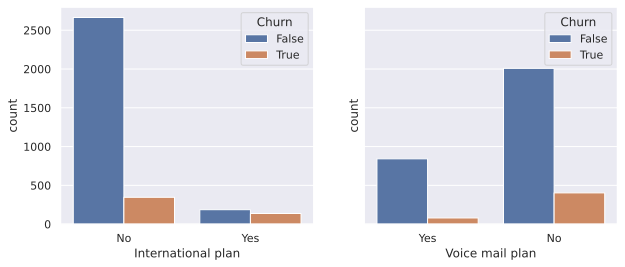

In [46]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

**Nota**: para los clientes que tienen activado el *International Plan*, el ratio de abandono de la compañía es mucho mayor. Por el contrario no ocurre lo mismo para aquellos clientes que tienen activado el *Voice mail plan*.

*Tabla de contingencia*

Además de usar gráficas para realizar un análisis categórico, existe una herramienta tradicional de estadística que se puede utilizar: las tablas de contingencia. Estas tablas muestran una distribución de frecuencias multivariante de descriptores categóricos. En concreto, permite ver la distribución de un descriptor condicionado por otro mirando una fila o columna. 

Vamos a ver cómo el descriptor *Churn* se relaciona con el descriptor categórico *State*.

In [47]:
pd.crosstab(df['State'], df['Churn']).T

State  AK  AL  AR  AZ  CA  CO  CT  DC  DE  FL  ...  SD  TN  TX  UT  VA  VT  \
Churn                                          ...                           
False  49  72  44  60  25  57  62  49  52  55  ...  52  48  54  62  72  65   
True    3   8  11   4   9   9  12   5   9   8  ...   8   5  18  10   5   8   

State  WA  WI  WV  WY  
Churn                  
False  52  71  96  68  
True   14   7  10   9  

[2 rows x 51 columns]

En el caso del descriptor *State*, el número de posibles valores es alto (51). Vemos que hay unos pocos datos para cada estado individual (solo de 3 a 17 clientes por estado abandonan la compañía). Vamos a ignorar por un momento este hecho y vamos a calcular el ratio de fidelización por estado, ordenado de mayor a menor. 

In [48]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State        NJ        CA    TX        MD        SC        MI        MS  \
mean   0.264706  0.264706  0.25  0.242857  0.233333  0.219178  0.215385   

State        NV        WA        ME  ...        RI        WI        IL  \
mean   0.212121  0.212121  0.209677  ...  0.092308  0.089744  0.086207   

State        NE        LA        IA        VA      AZ        AK        HI  
mean   0.081967  0.078431  0.068182  0.064935  0.0625  0.057692  0.056604  

[1 rows x 51 columns]

A primera vista parece que el ratio de fidelidad en *New Jersey* (NJ) y *California* (CA) está por encima del 25%, mientras que está por debajo del 6% en Hawaii (HI) y Alaska (AK). Sin embargo, no hay suficientes datos para llegar a esta conlusión. Podríamos confirmar estas hipótesis usando los tests de [Matthews](https://en.wikipedia.org/wiki/Matthews_correlation_coefficient) y [Cramer](https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V) pero esto queda fuera del alcance de este notebook.

### 4. Dataset completo

#### 4.1 Aproximación ingenua

Hasta el momento hemos estado mirando distintos aspectos de nuestro dataset adivinando descriptores interesantes y tomando unos pocos de ellos para visualizarlos. Solo hemos tratado con dos o tres descriptores a la vez, y ha sido sencillo interpretar las relaciones entre los resultados gracias a las gráficas. Pero, esto no nos permite visualizar todos los descriptores e interpretar dicha visualización. 

Una opción es usar `hist()` o crear una matriz de dispersión con `pairplot()` para el dataset completo con la intención de visualizar todos los descriptores a la vez. Pero, cuando el número de descriptores crece estas visualizaciones son lentas e ineficientes. Además, usando ese modo estaríamos analizando los descriptores en parejas y no como un todo.

#### 4.2 Reducción de la dimensionalidad

La mayoría de datasets del mundo real tienen muchos descriptores, en ocasiones, miles. Cada uno de ellos puede verse como una dimensión en el espacio de los puntos de datos. Por lo tanto, en la mayoría de las ocasiones tenemos que trabajar con datos de altas dimensiones donde la visualización no es posible.

Uno de los métodos de reducción de la dimensionaliad es el análisis de componentes principales (PCA), que veremos en otro notebook. Este método es un algoritmo lineal lo que impone ciertas restricciones sobre los datos. Existen también otros métodos no lineales que veremos de manera más detallada en otro notebook, aquí solo nos centraremos en uno llamado *t-SNE*.

#### 4.3 t-SNE

Vamos a crear una representación [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) de los datos de fidelidad que hemos estado utilizando. 

El nombre del método suena complejo (t-SNE viene de *t-distributed Stohastic Neighbor Embedding*) y las matemáticas subyacentes también tienen cierta complejidad (si estás interesado el [artículo original](http://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) fue publicado en la revista [JMLR](http://www.jmlr.org/)). La idea intuitiva consiste en encontrar una projección de un espacio de dimensión alta en un plano (2D o 3D) tal que los puntos que se encuentran alejados en el espacio n-dimensional inicial acaben también separados en el plano 2D o 3D, y que los que están cerca permanezcan también cerca.

Vamos a ver un ejemplo, para lo cual es necesario añadir ciertas librerías.

In [49]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Para nuestro ejemplo no vamos a considerar los descriptores *State* y *Churn*, y vamos a convertir los valores de los descriptores binarios de "Yes"/"No" a valores numéricos usando [`pandas.Series.map()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html):

In [50]:
X = df.drop(['Churn', 'State'], axis=1)
X['International plan'] = X['International plan'].map({'Yes': 1, 'No': 0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes': 1, 'No': 0})

También necesitamos normalizar los datos. Para ello, tenemos que restar la media a cada descriptor y dividirlo por la desviación típica. Todo esto se puede hacer usando `StandardScaler`.

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

A continuación construimos la representación t-SNE (lo que puede llevar cierto tiempo).

In [52]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


CPU times: user 49.6 s, sys: 407 ms, total: 50 s
Wall time: 25.9 s


y la mostramos. 

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5);

Vamos a colorear dicha representación usando el descriptor *Churn* (en concreto usamos el color azul para los clientes fieles y el naranja para los otros).

In [ ]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1],
            c=df['Churn'].map({False: 'blue', True: 'orange'}), alpha=.5);

Podemos ver que los clientes que abandonaron la compañía se encuentran concentrados en ciertas áreas. 

Para entender mejor el gráfico, podemos colorearlo utilizando el resto de descriptores binarios: *International Plan* y *Voicemail*. Los puntos naranja indican aquellos casos que son positivos (True) para el correspondiente descriptor binario.

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1], 
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5);
    axes[i].set_title(name);

A partir de los gráficos anteriores se puede ver claramente que los clientes insatisfechos que cancelaron su subscripción se concentran en un grupo de personas con plan internacional pero sin servicio de voz. 

Para acabar vamos a nombrar algunas desventajas del método t-SNE:
- Alta complejidad computacional. La [implementaciónn](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) en `scikit-learn` no es aplicable en ejemplos reales. En casos donde hay un gran número de ejmplos deberías usar [Multicore-TSNE](https://github.com/DmitryUlyanov/Multicore-TSNE).
- Los gráficos generados pueden variar mucho dependiendo del valor de la semilla, lo que complica la interpretación.

En ocasiones, el uso dee t-SNE puede proporconar una buena intuición de los datos como veremos en uno de los otros notebooks de esta práctica. 

## Ejercicio

Utilizando lo visto hasta ahora, completa los siguientes ejercicios. Comienza descargando el dataset 'titanic_train.csv' (que representa datos de supervivencia del Titanic) y almacenalo en un DataFrame llamado df.

In [6]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/titanic_train.csv -O titanic_train.csv

--2022-04-15 16:30:01--  https://raw.githubusercontent.com/IA1819/Datasets/master/titanic_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  58.89K  --.-KB/s    in 0.006s  

2022-04-15 16:30:01 (9.14 MB/s) - ‘titanic_train.csv’ saved [60302/60302]



In [8]:
df2 = pd.read_csv('titanic_train.csv')

Comenzamos obteniendo estadísticas de los distintos descriptores e información sobre los mismos. 

In [13]:
df2.describe(include='all')

PassengerId    Survived      Pclass                     Name   Sex  \
count    712.000000  712.000000  712.000000                      712   712   
unique          NaN         NaN         NaN                      712     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   453   
mean     448.589888    0.404494    2.240169                      NaN   NaN   
std      258.683191    0.491139    0.836854                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      222.750000    0.000000    1.000000                      NaN   NaN   
50%      445.000000    0.000000    2.000000                      NaN   NaN   
75%      677.250000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare Embarked  
count   712.000000  712.000000  712.000000     712  712.000000      712  
unique         NaN         NaN         NaN     541         NaN        3  
top            NaN         NaN         NaN  347082         NaN        S  
freq           NaN         NaN         NaN       7         NaN      554  
mean     29.642093    0.514045    0.432584     NaN   34.567251      NaN  
std      14.492933    0.930692    0.854181     NaN   52.938648      NaN  
min       0.420000    0.000000    0.000000     NaN    0.000000      NaN  
25%      20.000000    0.000000    0.000000     NaN    8.050000      NaN  
50%      28.000000    0.000000    0.000000     NaN   15.645850      NaN  
75%      38.000000    1.000000    1.000000     NaN   33.000000      NaN  
max      80.000000    5.000000    6.000000     NaN  512.329200      NaN

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


Vamos a eliminar el descriptor *Cabin* y todas aquellas columnas a las que les falten valores.  

In [ ]:
df2 = df2.drop('Cabin', axis=1).dropna()

Construye una matriz de gráficos de diagramas de dispersión para los pares de descriptores Age, Fare, SibSp, Parch y Survived. 

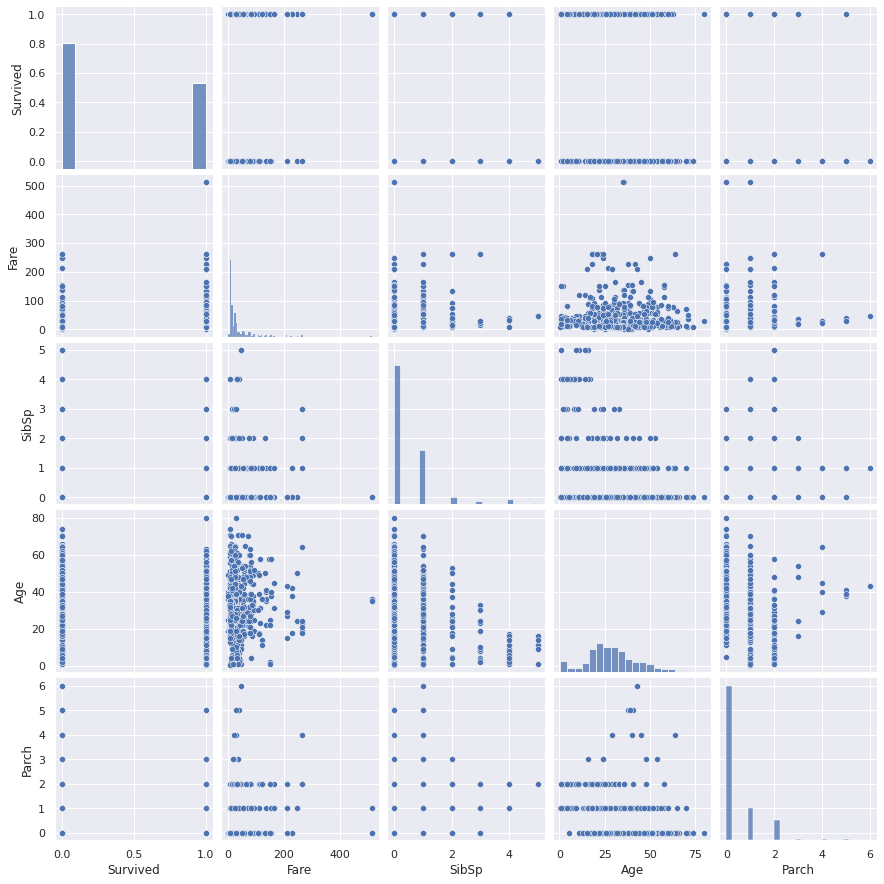

In [31]:
numerical2 = list(set(['Age', 'Fare', 'SibSp', 'Parch', 'Survived']))
%config InlineBackend.figure_format = 'png'
sns.pairplot(df2[numerical2]);

In [32]:
%config InlineBackend.figure_format = 'svg'

Construye un diagrama de cajas para mostrar la dependencia del precio (descriptor Fare) con el valor del descriptor Pclass. 

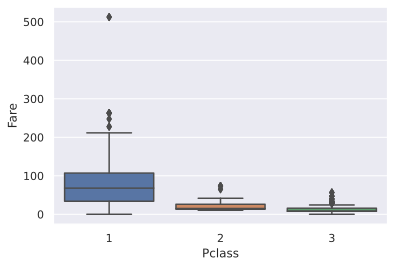

In [37]:
sns.boxplot(x='Pclass', y='Fare', data=df2)

¿Cuál es la dependencia entre los pasajeros que sobrevieron y el género? Muestralo usando ``countplot`` del paquete seaborn usando el argumento hue.

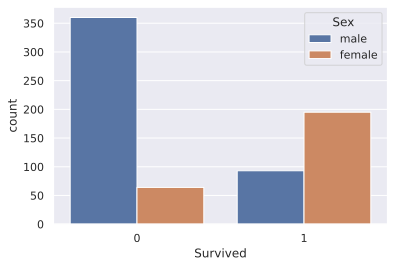

In [43]:
sns.countplot(x='Survived', data=df2, hue='Sex');

Muestra la diferencia en los precios de los billetes para aquellos que sobrevivieron y quienes no usando ``boxplot``.

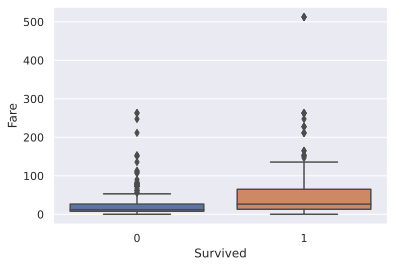

In [44]:
sns.boxplot(x='Survived', y='Fare', data=df2)

¿Cómo depende la supervivencia de los pasajeros con respecto a la edad? Verifica gráficamente que hubo más personas de menos de 30 años que sobrevivieron que las de más de 55. 

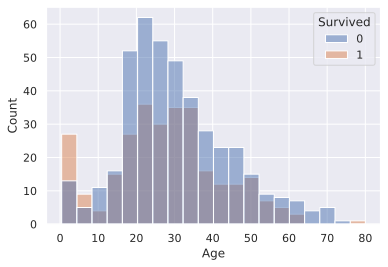

In [59]:
sns.histplot(data=df2, x='Age', hue='Survived')

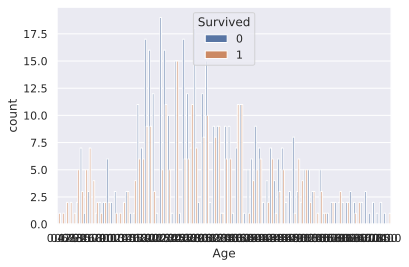

In [57]:
sns.countplot(x='Age', hue='Survived', data=df2);

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.